In [25]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["target"] = iris["target"]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris["data"], 
                                                    iris["target"], 
                                                    test_size=0.1)

In [27]:
# 第一步:
#algorithm=auto: 距離計算的演算法，作法上是建議讓演算法去自動判斷資料的稀疏程度自己選即可
#algorithm=elkan: 利用了兩邊之和大於等於第三邊,以及兩邊之差小於第三邊的三角形性質，來減少距離的計算
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=3)
clu.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
clu.labels_

array([2, 1, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 0, 2, 1, 1, 0, 2, 1, 2, 0, 2,
       0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 0, 2,
       1, 2, 1, 0, 0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 2, 0, 2, 1, 1, 2, 0,
       0, 1, 1, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 2, 2, 2, 0,
       2, 2, 2, 0, 0, 0, 2, 1, 2, 1, 1, 1, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0,
       0, 2, 1])

In [29]:
# 第二步:
from sklearn.metrics import accuracy_score
pre = clu.predict(x_test)
print("正確率:", accuracy_score(pre, y_test) * 100, "%")

正確率: 46.666666666666664 %


In [30]:
print(pre)
print(y_test)

[1 2 0 2 0 2 0 2 0 1 2 2 2 2 2]
[1 1 0 1 0 1 0 1 0 2 2 1 1 1 2]


In [31]:
from sklearn.metrics import silhouette_score
y = []
x = []
for k in range(2, 6):
    clu = KMeans(n_clusters=k)
    clu.fit(iris["data"])
    x.append(k)
    y.append(silhouette_score(iris["data"], clu.labels_))
print(x)
print(y)

[2, 3, 4, 5]
[0.681046169211746, 0.552819012356409, 0.4980505049972864, 0.4887488870931044]


Text(0.5, 1.0, 'Sihouette Score V.S. K')

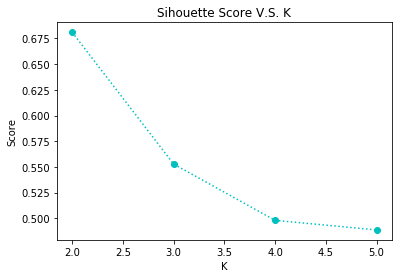

In [32]:
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
# https://www.w3schools.com/cssref/css_websafe_fonts.asp
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x, y, "co:")
plt.xlabel("K")
plt.ylabel("Score")
plt.title("Sihouette Score V.S. K")